In [14]:
import pandas as pd
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import numpy as np

In [ ]:
#MLR based on stu_brains folder1-4

In [15]:
df = pd.read_csv('Resources/data3_load_assault_group_to_ML.csv')
df.head()

,Unnamed: 0,Booking_year_month,DOB_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,3,2015-08,1013,153,14.0,3.0,7.0,4.0,0.0,0.0,...,23.0,21.0,14.0,142.0,0.0,0.0,0.0,13.0,52.0,77.0
1,4,2015-09,803,121,132.0,13.0,91.0,28.0,22.0,13.0,...,18.0,22.0,32.0,153.0,0.0,0.0,0.0,14.0,43.0,96.0
2,5,2015-10,1057,156,142.0,18.0,92.0,32.0,14.0,13.0,...,13.0,10.0,16.0,121.0,0.0,0.0,0.0,11.0,44.0,66.0
3,6,2015-11,774,114,153.0,15.0,112.0,26.0,24.0,17.0,...,18.0,26.0,23.0,0.0,0.0,0.0,156.0,10.0,46.0,100.0
4,7,2015-12,891,129,121.0,11.0,84.0,26.0,13.0,22.0,...,13.0,17.0,8.0,0.0,0.0,0.0,114.0,5.0,42.0,67.0


In [16]:
# Drop innecesary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
# Add column of integers 
df['date_index'] = np.arange(len(df))+1

In [18]:
df.drop(['Booking_year_month','DOB_month'], axis=1, inplace=True)

In [19]:
df.columns

Index(['total_crime', 'total_crime_3', 'age<25_3', 'age26-50_3', 'age>50_3',
       'day_of_week_Monday_3', 'day_of_week_Tuesday_3',
       'day_of_week_Wednesday_3', 'day_of_week_Thursday_3',
       'day_of_week_Friday_3', 'day_of_week_Saturday_3',
       'day_of_week_Sunday_3', 'summer_3', 'spring_3', 'winter_3', 'autum_3',
       'CityRN_FOREIGN_3', 'CityRN_HOMELESS_3', 'CityRN_MIAMI_3',
       'total_crime_2', 'Age<25_2', 'Age26-50_2', 'Age>50_2',
       'day_of_week_Monday_2', 'day_of_week_Tuesday_2',
       'day_of_week_Wednesday_2', 'day_of_week_Thursday_2',
       'day_of_week_Friday_2', 'day_of_week_Saturday_2',
       'day_of_week_Sunday_2', 'summer_2', 'spring_2', 'winter_2', 'autum_2',
       'CityRN_FOREIGN_2', 'CityRN_HOMELESS_2', 'CityRN_MIAMI_2',
       'total_crime_1', 'age<25_1', 'age26-50_1', 'age>50_1',
       'day_of_week_Monday_1', 'day_of_week_Tuesday_1',
       'day_of_week_Wednesday_1', 'day_of_week_Thursday_1',
       'day_of_week_Friday_1', 'day_of_week_Satur

In [20]:
df.head()

,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,day_of_week_Thursday_3,day_of_week_Friday_3,...,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1,date_index
0,153,14.0,3.0,7.0,4.0,0.0,0.0,0.0,0.0,3.0,...,21.0,14.0,142.0,0.0,0.0,0.0,13.0,52.0,77.0,1
1,121,132.0,13.0,91.0,28.0,22.0,13.0,23.0,24.0,19.0,...,22.0,32.0,153.0,0.0,0.0,0.0,14.0,43.0,96.0,2
2,156,142.0,18.0,92.0,32.0,14.0,13.0,29.0,28.0,23.0,...,10.0,16.0,121.0,0.0,0.0,0.0,11.0,44.0,66.0,3
3,114,153.0,15.0,112.0,26.0,24.0,17.0,20.0,20.0,18.0,...,26.0,23.0,0.0,0.0,0.0,156.0,10.0,46.0,100.0,4
4,129,121.0,11.0,84.0,26.0,13.0,22.0,23.0,24.0,13.0,...,17.0,8.0,0.0,0.0,0.0,114.0,5.0,42.0,67.0,5


In [26]:
train=df[0:43]
test=df[43:] 

In [28]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = train[['total_crime', 'total_crime_3', 'age<25_3', 'age26-50_3', 'age>50_3',
       'day_of_week_Monday_3', 'day_of_week_Tuesday_3',
       'day_of_week_Wednesday_3', 'day_of_week_Thursday_3',
       'day_of_week_Friday_3', 'day_of_week_Saturday_3',
       'day_of_week_Sunday_3', 'summer_3', 'spring_3', 'winter_3', 'autum_3',
       'CityRN_FOREIGN_3', 'CityRN_HOMELESS_3', 'CityRN_MIAMI_3',
       'total_crime_2', 'Age<25_2', 'Age26-50_2', 'Age>50_2',
       'day_of_week_Monday_2', 'day_of_week_Tuesday_2',
       'day_of_week_Wednesday_2', 'day_of_week_Thursday_2',
       'day_of_week_Friday_2', 'day_of_week_Saturday_2',
       'day_of_week_Sunday_2', 'summer_2', 'spring_2', 'winter_2', 'autum_2',
       'CityRN_FOREIGN_2', 'CityRN_HOMELESS_2', 'CityRN_MIAMI_2',
       'total_crime_1', 'age<25_1', 'age26-50_1', 'age>50_1',
       'day_of_week_Monday_1', 'day_of_week_Tuesday_1',
       'day_of_week_Wednesday_1', 'day_of_week_Thursday_1',
       'day_of_week_Friday_1', 'day_of_week_Saturday_1',
       'day_of_week_Sunday_1', 'summer_1', 'spring_1', 'winter_1', 'autum_1',
       'CityRN_FOREIGN_1', 'CityRN_HOMELESS_1', 'CityRN_MIAMI_1']]
y = train["date_index"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (43, 55) (43, 1)


ValueError: x and y must be the same size

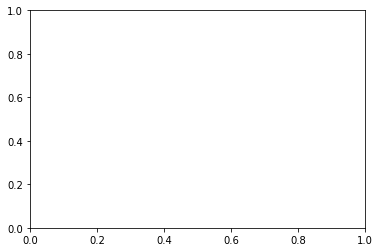

In [29]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Brain Weight")
plt.ylabel("Head Size")
### END SOLUTION

In [30]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [31]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [32]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 487.1484827762051
R-squared (R2 ): -1.5686319686212666


In [34]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

-1.5686319686212666